In [104]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)

### Load Data

In [105]:
iris_dataset = datasets.load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [106]:
x = iris_dataset.data
y = iris_dataset.target
feature_names = iris_dataset.feature_names

In [107]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [108]:
iris = pd.DataFrame(x,columns=feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [109]:
iris['Species']=y

In [110]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [111]:
np.unique(y)   # 去除数组中重复的元素，并由小到大排序返回

array([0, 1, 2])

### EDA-Exploratory Data Analysis

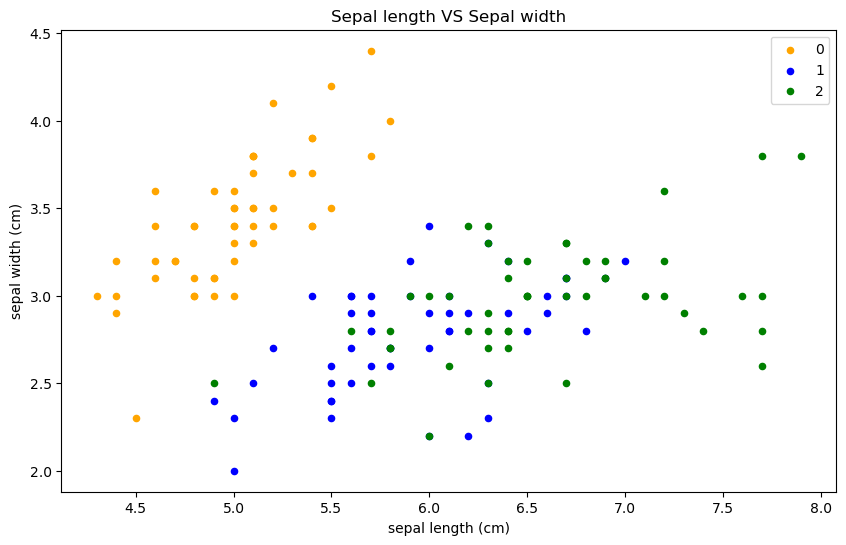

In [112]:
fig = iris[iris.Species==0].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='orange',label=0)
iris[iris.Species==1].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='blue',label=1,ax=fig)
iris[iris.Species==2].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='green',label=2,ax=fig)
fig.set_xlabel('sepal length (cm)')
fig.set_ylabel('sepal width (cm)')
fig.set_title('Sepal length VS Sepal width')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

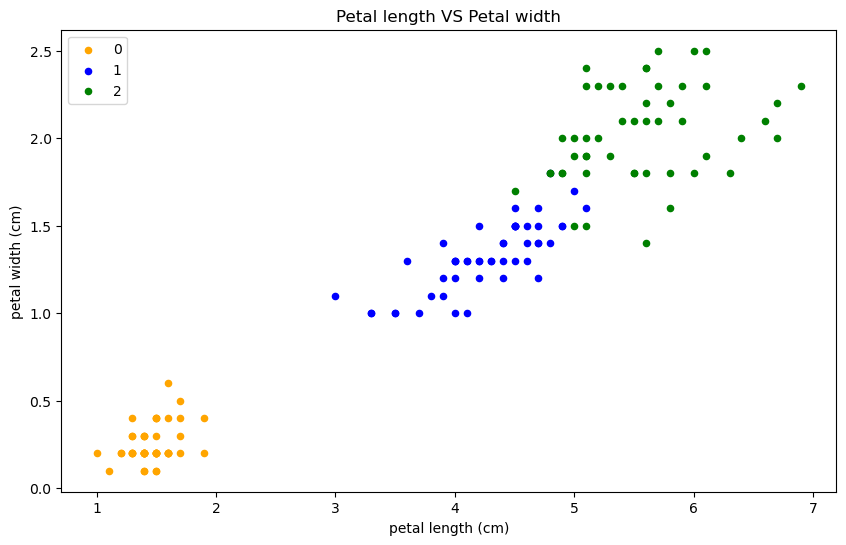

In [113]:
fig = iris[iris.Species==0].plot(kind='scatter',x='petal length (cm)',y='petal width (cm)',color='orange',label=0)
iris[iris.Species==1].plot(kind='scatter',x='petal length (cm)',y='petal width (cm)',color='blue',label=1,ax=fig)
iris[iris.Species==2].plot(kind='scatter',x='petal length (cm)',y='petal width (cm)',color='green',label=2,ax=fig)
fig.set_xlabel('petal length (cm)')
fig.set_ylabel('petal width (cm)')
fig.set_title('Petal length VS Petal width')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Classification - DT

In [136]:
train,test = train_test_split(iris,test_size=0.2,random_state=888)
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [137]:
train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [138]:
train_X = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
train_y = train[['Species']]
test_X = test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
test_y = test[['Species']]

In [139]:
train_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
38,4.4,3.0,1.3,0.2
54,6.5,2.8,4.6,1.5
101,5.8,2.7,5.1,1.9
65,6.7,3.1,4.4,1.4
0,5.1,3.5,1.4,0.2


In [140]:
train_y.head()

,Species
38,0
54,1
101,2
65,1
0,0


In [141]:
model_dt = DecisionTreeClassifier()
model_dt.fit(train_X,train_y) # feed data

DecisionTreeClassifier()

In [142]:
# predict testing set
prediction_dt = model_dt.predict(test_X)
print('The accuracy of the DT is',metrics.accuracy_score(prediction_dt,test_y))

The accuracy of the DT is 0.9333333333333333


### Classification - KNN

In [147]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=0)

In [148]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=3)

In [150]:
prediction_knn = model_knn.predict(test_x)
print('The accuracy of the KNN is',model_knn.score(test_x,test_y))

The accuracy of the KNN is 0.9666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [153]:
print('true value     ',test_y)
print('predicted value',prediction_knn)

true value      [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
predicted value [2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
